In [1]:
import os
import sys
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
csv_dir = r"E:\XD\P4V\ed_yuhang_eng\内存\Android\MemReports\Etheria-Android-03.14-10.58.07\CSV"
bytes_format = "MB"
num_top = 10 # num of tops to plot

csv_file : Memory.csv
Top Memory Var Names : ['STAT_RenderTargetMemory2D', 'STAT_TextureMemory2D', 'STAT_SkeletalMeshVertexMemory', 'STAT_AkMediaMemoryAllocated', 'STAT_VertexBufferMemory', 'STAT_TextureMemory', 'STAT_StaticMeshTotalMemory', 'STAT_PakCacheMem', 'STAT_TEXTUREGROUP_UI', 'MCR_UsedStreamingPool']
Their diff against base : [52660876 36760820 28530640 24200886 23161696 21022737 19369952 17235968
 16076684 14412180]


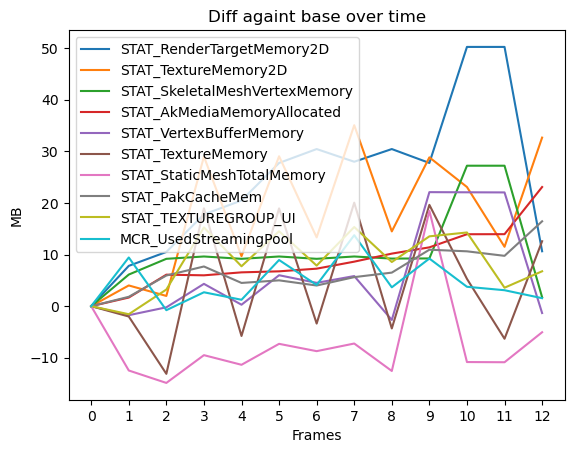

<Figure size 640x480 with 0 Axes>



csv_file : Object_Classes_Bytes.csv
Top Memory Var Names : ['AnimSequence', 'MapBuildDataRegistry', 'Image', 'MorphTarget', 'MovieSceneCompiledDataManager', 'MovieScene3DTransformSection', 'UIParticleEmitterAsset', 'Overlay', 'MovieScene2DTransformSection', 'TextBlock']
Their diff against base : [15182981.  1898978.  1070213.   697282.   480716.   469391.   383908.
   371271.   346798.   341996.]


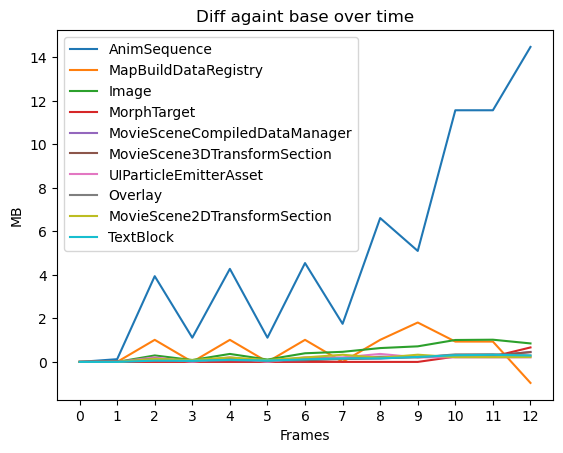

<Figure size 640x480 with 0 Axes>



csv_file : Object_Classes_Count.csv
Top Memory Var Names : ['MovieSceneBuiltInEasingFunction', 'OverlaySlot', 'Image', 'Overlay', 'Package', 'Function', 'CanvasPanelSlot', 'HorizontalBoxSlot', 'MovieSceneFloatSection', 'MovieSceneFloatTrack']
Their diff against base : [3788. 2673. 1858.  994.  850.  760.  672.  615.  498.  498.]


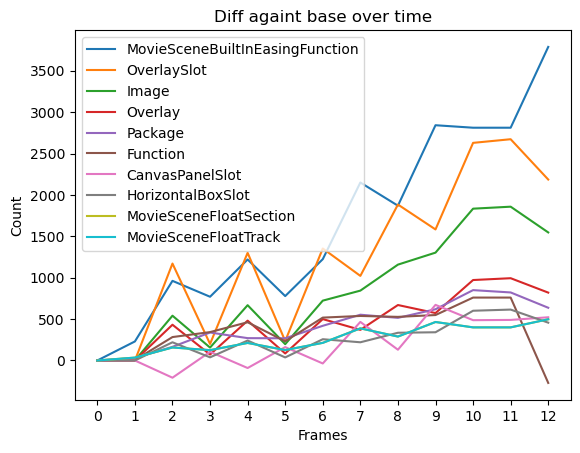

<Figure size 640x480 with 0 Axes>



csv_file : Object_Level.csv
Top Memory Var Names : ['/Game/Blueprints/Framework/Levels/Etheria.Etheria:PersistentLevel', '/Game/Maps/Levels/PostProcess/PP_Battle_LevelInstance_38.PP_Battle:PersistentLevel', '/Game/Maps/Levels/Scenario/01_Museum/Museum_LevelInstance_3.Museum:PersistentLevel', '/Game/Maps/Levels/Scenario/01_Museum/Museum_Inside_Sub_LevelInstance_4.Museum_Inside_Sub:PersistentLevel', '/Game/Maps/Levels/Scenario/01_Museum/Museum_Inside_Config_LevelInstance_9.Museum_Inside_Config:PersistentLevel', '/Game/Maps/Levels/BattleShared/Battle_Env_1_LevelInstance_37.Battle_Env_1:PersistentLevel', '/Game/Maps/Levels/Scenario/01_Museum/Museum_Inside_Story_LevelInstance_5.Museum_Inside_Story:PersistentLevel', '/Game/Maps/Levels/PreChapter/PreChapterl_BossBattleField_Art_LevelInstance_39.PreChapterl_BossBattleField_Art:PersistentLevel', '/Game/Maps/Levels/Scenario/01_Museum/Museum_Inside_Audio_LevelInstance_8.Museum_Inside_Audio:PersistentLevel', '/Game/Maps/Levels/PreChapter/PreChap

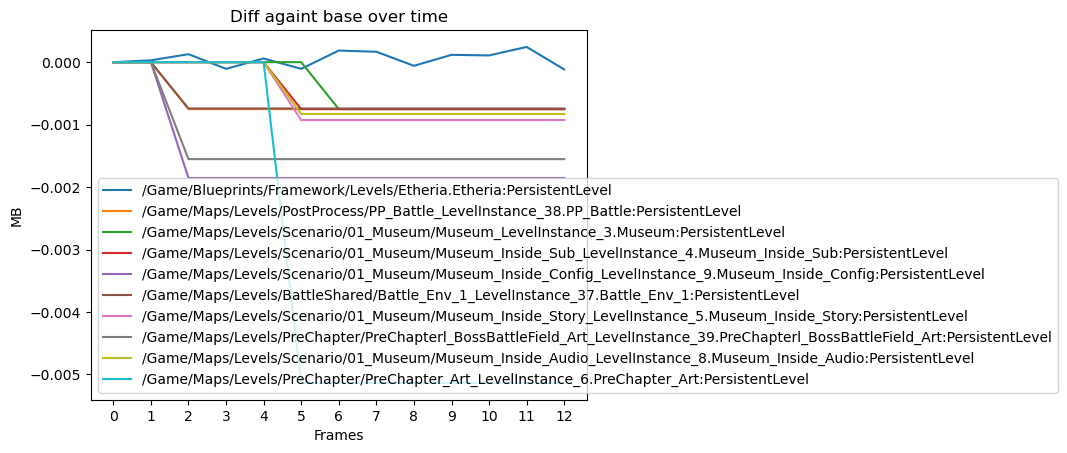

<Figure size 640x480 with 0 Axes>



csv_file : Object_SkeletalMesh.csv
Top Memory Var Names : ['/Game/ArtResources/Characters/Cst/Cst_Thug/Cst_Thug_Const/SK_Cst_Thug_Const_LOD0.SK_Cst_Thug_Const_LOD0', '/Game/ArtResources/Characters/Cst/Cst_Lin/Cst_Lin_Light/SK_Cst_Lin_Light_LOD0.SK_Cst_Lin_Light_LOD0', '/Game/ArtResources/Characters/Chr/Chr_Friday_New/SK_Agt_Friday_NEW_LOD0.SK_Agt_Friday_NEW_LOD0', '/Game/ArtResources/Characters/Chr/Chr_Male/SK_Chr_Male.SK_Chr_Male', '/Game/ArtResources/Characters/Cst/Cst_Ark/Cst_Ark_Disor/SK_Cst_Ark_Disor_LOD0.SK_Cst_Ark_Disor_LOD0', '/Game/ArtResources/Characters/Cst/Cst_GenerousA/Cst_GenerousA_Odd/SK_Cst_GenerousA_Odd_LOD0.SK_Cst_GenerousA_Odd_LOD0', '/Game/ArtResources/Characters/Cst/Cst_Gorilla/Cst_Gorilla_Disor/SK_Cst_Gorilla_Disor_LOD0.SK_Cst_Gorilla_Disor_LOD0', '/Game/ArtResources/Characters/Cst/Cst_Guard/Cst_Guard_Odd/SK_Cst_Guard_Odd.SK_Cst_Guard_Odd', '/Game/ArtResources/Characters/Cst/Cst_Guard/Cst_Guard_Odd/SK_Cst_Guard_Odd_weapon_LOD0.SK_Cst_Guard_Odd_weapon_LOD0', '/Ga

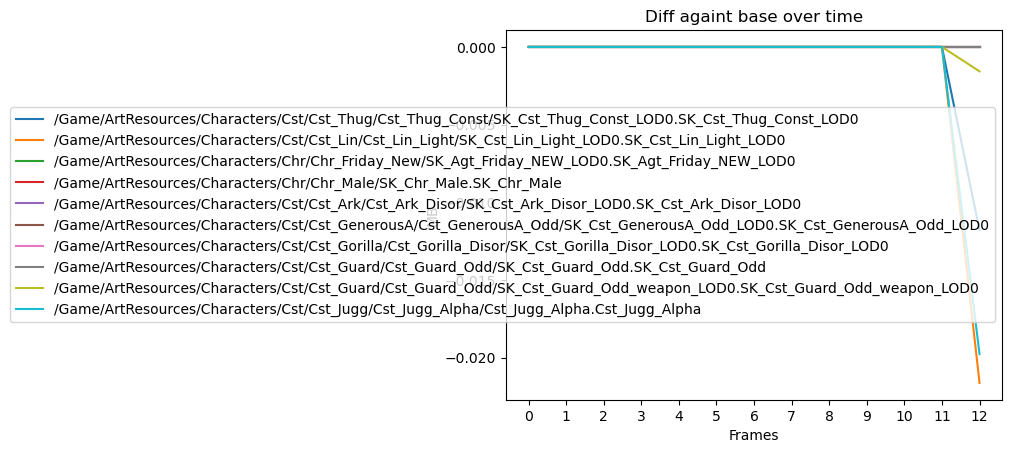

<Figure size 640x480 with 0 Axes>



csv_file : Object_Soundwaves.csv
Top Memory Var Names : []
Their diff against base : []


<Figure size 640x480 with 0 Axes>



csv_file : Object_StaticMesh.csv
Top Memory Var Names : ['/Game/ArtResources/Effects/Meshes/SM_Fx_Plane_0307.SM_Fx_Plane_0307', '/Game/ArtResources/Environment/PreChapter/Meshes/SM_PreChapter_Railing001.SM_PreChapter_Railing001', '/Game/ArtResources/Environment/PreChapter/Meshes/SM_PreChapter_InfoTerminals004.SM_PreChapter_InfoTerminals004', '/Game/ArtResources/Environment/PreChapter/Meshes/SM_PreChapter_Logo001.SM_PreChapter_Logo001', '/Game/ArtResources/Environment/PreChapter/Meshes/SM_PreChapter_OutBox001.SM_PreChapter_OutBox001', '/Game/ArtResources/Environment/PreChapter/Meshes/SM_PreChapter_OutBox002.SM_PreChapter_OutBox002', '/Game/ArtResources/Environment/PreChapter/Meshes/SM_PreChapter_Pillar002a.SM_PreChapter_Pillar002a', '/Game/ArtResources/Environment/PreChapter/Meshes/SM_PreChapter_Plantpot001a.SM_PreChapter_Plantpot001a', '/Game/ArtResources/Environment/PreChapter/Meshes/SM_PreChapter_Railing002.SM_PreChapter_Railing002', '/Game/ArtResources/Environment/PreChapter/Meshe

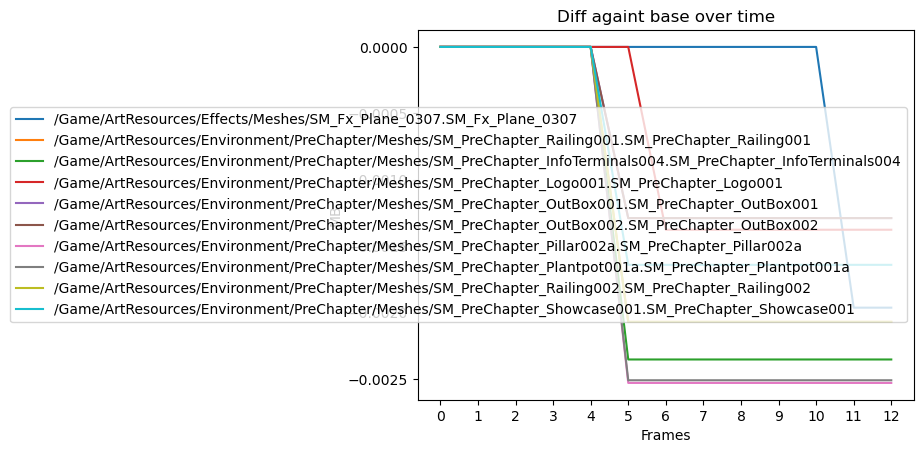

<Figure size 640x480 with 0 Axes>



csv_file : Persistent_Count.csv
Top Memory Var Names : ['Name', 'BP_BattleActor_C_2147474394', 'BP_Battle_Effect_C_2147473985', 'BP_Battle_Effect_C_2147473987', 'BP_Battle_Effect_C_2147474221', 'BP_Battle_Effect_C_2147474245', 'BP_Battle_Effect_C_2147474269', 'BP_Battle_Effect_C_2147474289', 'BP_BattleActor_C_2147474150', 'BP_BattleActor_C_2147474322']
Their diff against base : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


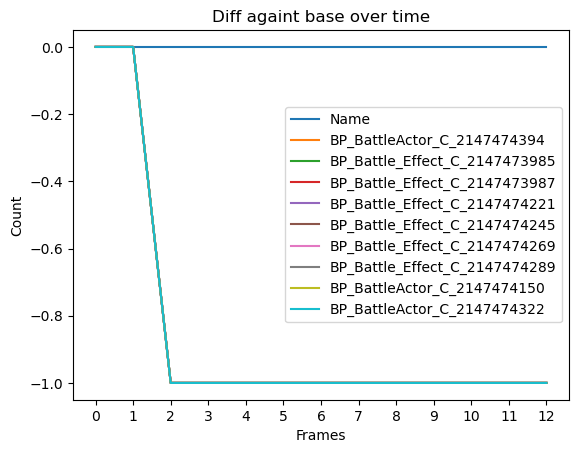

<Figure size 640x480 with 0 Axes>



csv_file : Render_Target_Pools.csv
Top Memory Var Names : ['ShadowDepthAtlas (ShadowDepth)-1024x1024-1', 'GaussianPyramid (FloatR11G11B10)-486x 224-7', 'GaussianDownSampleTemp (FloatR11G11B10)-224x 486-1', 'GaussianDownSampleTemp (FloatR11G11B10)-112x 122-1', 'GaussianDownSampleTemp (FloatR11G11B10)-56x  61-1', 'GaussianDownSampleTemp (FloatR11G11B10)-28x  31-1', 'GaussianDownSampleTemp (FloatR11G11B10)-14x  16-1', 'GaussianDownSampleTemp (FloatR11G11B10)-7x   8-1', 'SunMerge (FloatR11G11B10)-31x  14-1', 'SunMerge (FloatR11G11B10)-61x  28-1']
Their diff against base : [8388608.       0.       0.       0.       0.       0.       0.       0.
       0.       0.]


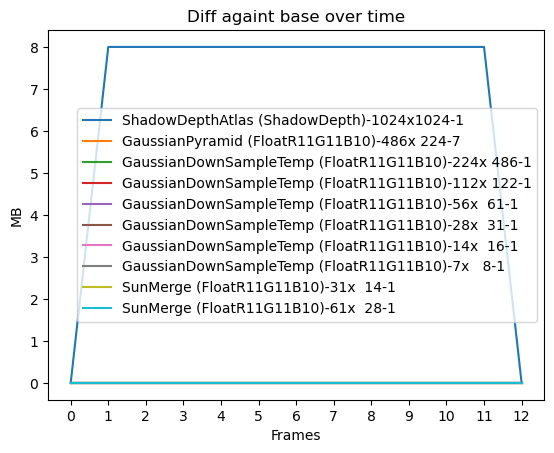

<Figure size 640x480 with 0 Axes>



csv_file : RHI_Memory.csv
Top Memory Var Names : ['STAT_RenderTargetMemory2D', 'STAT_TextureMemory2D', 'STAT_VertexBufferMemory', 'STAT_IndexBufferMemory', 'STAT_TextureMemory3D', 'STAT_TextureMemoryCube', 'STAT_UniformBufferMemory', 'STAT_RenderTargetMemory3D', 'STAT_RenderTargetMemoryCube', 'STAT_StructuredBufferMemory']
Their diff against base : [52660876 36760820 23161696  8201748   510912   481152   120736        0
        0        0]


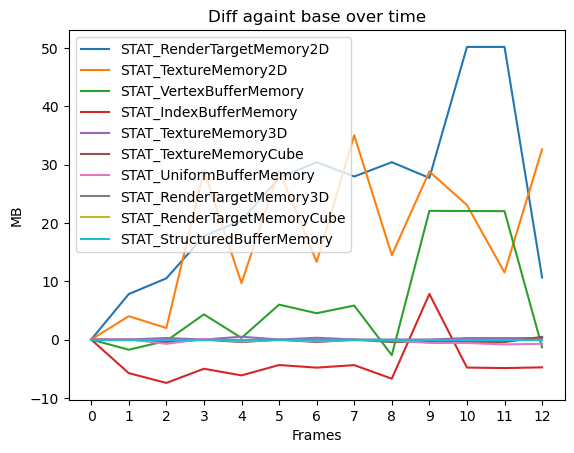

<Figure size 640x480 with 0 Axes>



csv_file : TextureFormat_In_Mem.csv
Top Memory Var Names : ['PF_B8G8R8A8', 'PF_ASTC_6x6', 'PF_Unknown', 'PF_FloatRGBA', 'PF_ASTC_8x8', 'PF_ASTC_5x5', 'PF_ASTC_10x10', 'PF_ASTC_HDR_6x6', 'PF_G8', 'PF_ASTC_4x4']
Their diff against base : [23540530 16242442  2327839  1761607  1184891   734004   723518   482345
   440402    20972]


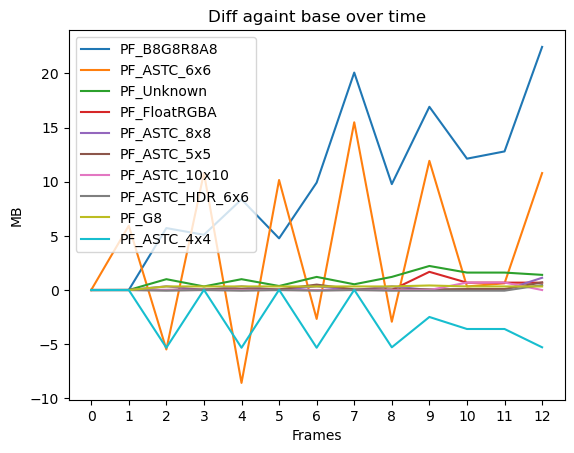

<Figure size 640x480 with 0 Axes>



csv_file : TextureFormat_On_Disk.csv
Top Memory Var Names : ['PF_B8G8R8A8', 'PF_ASTC_6x6', 'PF_FloatRGBA', 'PF_Unknown', 'PF_ASTC_8x8', 'PF_ASTC_10x10', 'PF_ASTC_5x5', 'PF_ASTC_HDR_6x6', 'PF_G8', 'PF_ASTC_4x4']
Their diff against base : [23540530  3774872  1761607  1635778  1163919   723518   671089   482345
    94372    41943]


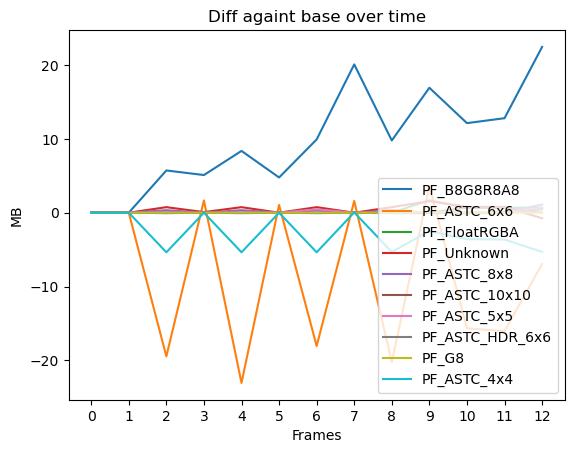

<Figure size 640x480 with 0 Axes>



csv_file : TextureGroup_In_Mem.csv
Top Memory Var Names : ['TEXTUREGROUP_World', 'TEXTUREGROUP_UI', 'TEXTUREGROUP_Effects', 'TEXTUREGROUP_WorldNormalMap', 'TEXTUREGROUP_Shadowmap', 'TEXTUREGROUP_CharacterSpecular', 'TEXTUREGROUP_Character', 'TEXTUREGROUP_CharacterNormalMap', 'TEXTUREGROUP_Bokeh', 'TEXTUREGROUP_Lightmap']
Their diff against base : [17259562. 17186160. 12310283.  6952059.   891290.   859833.   692060.
    41943.        0.        0.]


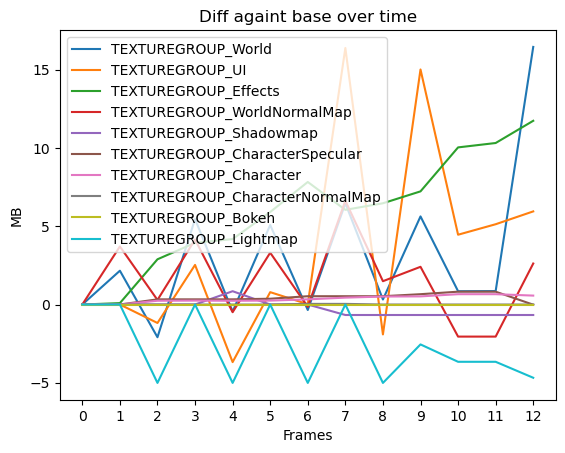

<Figure size 640x480 with 0 Axes>



csv_file : TextureGroup_On_Disk.csv
Top Memory Var Names : ['TEXTUREGROUP_UI', 'TEXTUREGROUP_World', 'TEXTUREGROUP_Effects', 'TEXTUREGROUP_Shadowmap', 'TEXTUREGROUP_WorldNormalMap', 'TEXTUREGROUP_Bokeh', 'TEXTUREGROUP_Lightmap', 'TEXTUREGROUP_CharacterSpecular', 'TEXTUREGROUP_CharacterNormalMap', 'TEXTUREGROUP_Character']
Their diff against base : [17186160. 11219764.  8157921.   891290.   251658.        0.        0.
        0.        0.        0.]


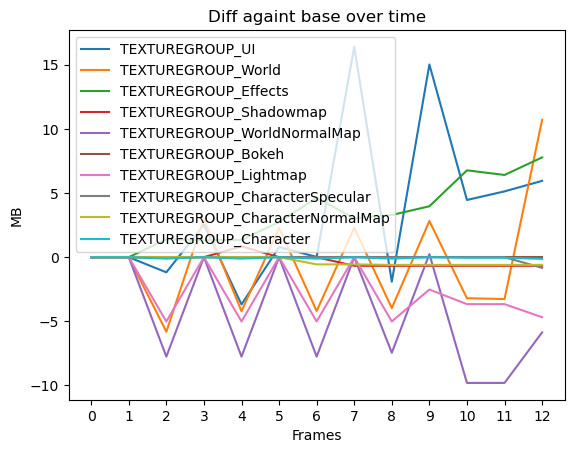

<Figure size 640x480 with 0 Axes>



csv_file : TextureTotal_In_Mem.csv
Top Memory Var Names : ['Total']
Their diff against base : [38283504]


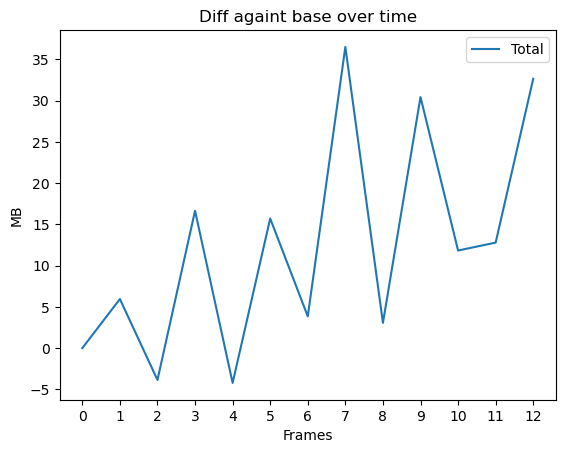

<Figure size 640x480 with 0 Axes>



csv_file : TextureTotal_On_Disk.csv
Top Memory Var Names : ['Total']
Their diff against base : [22764584]


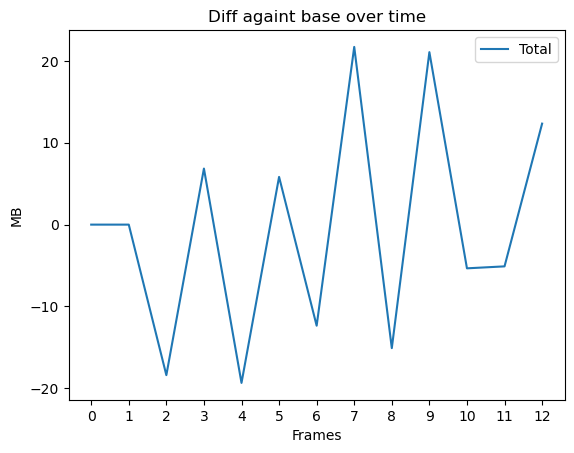

In [ ]:
if bytes_format == "KB":
    bytes_divider = 1024
elif bytes_format == "MB":
    bytes_divider = 1024 * 1024
else:
    bytes_divider = 1
    
# Get a list of all CSV files in the directory
csv_map = {}

# Loop through each CSV file and plot its data
for csv_file in [f for f in os.listdir(csv_dir) if f.endswith('.csv')]:
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(f'{csv_dir}/{csv_file}')
    df.fillna(0, inplace=True)
    csv_map[csv_file] = df
    
    bIsCountCSV = 'Count' in csv_file
    
    print(f'csv_file : {csv_file}')
    HistKeys = []
    for Col in df.columns:
        if Col.startswith('Val'):
            HistKeys.append(Col)
        
    #print(f'History Keys : {HistKeys}')
    VarNames = df['Name']
    BaseLineValues = []
    
    # Get base line values
    for i in range(len(df)):
        for hist in HistKeys[:1]:
            BaseLineValues.append(df.loc[i, hist])
            
    assert len(BaseLineValues) == len(VarNames)
            
    # Get history values, calculate Max and last value in history
    HistoryValuesForAllVar = []
    MaxValues = []
    LastValues = []
    for i in range(len(df)):
        Values = []
        for hist in HistKeys:
            Values.append(df.loc[i, hist])
        HistoryValuesForAllVar.append(Values)
        MaxValues.append(max(Values[1:])) # Calculate max value excluding the base value
        LastValues.append(Values[-1]) # Get Last value from history
        
    # Calculate Max and last value against base value
    assert len(BaseLineValues) == len(MaxValues)
    MaxBaseDiffValues = [MaxValues[i] - BaseLineValues[i] for i in range(len(BaseLineValues))]
    LastBaseDiffValues = [LastValues[i] - BaseLineValues[i] for i in range(len(BaseLineValues))]
        
    # Sort and find greatest memory influencer
    datas = [MaxBaseDiffValues] #[MaxBaseDiffValues, LastBaseDiffValues]
    for data in datas:
        np_data = np.array(data)
        sort_index = np.argsort(np_data)[::-1] # sort acending, thus reverse
        top_VarIndex = sort_index[:num_top]
        
        Top_HistoryValues = np.asarray(HistoryValuesForAllVar)[top_VarIndex]
        Top_BaseLineValues = np.asarray(BaseLineValues)[top_VarIndex]
        Top_VarNames = VarNames[top_VarIndex].to_list()
        
        print(f'Top Memory Var Names : {Top_VarNames}')
        print(f'Their diff against base : {np_data[top_VarIndex]}')
        
        for i in range(len(Top_VarNames)):
            var_name = Top_VarNames[i]
            # Apply bytes divider to byte data, if Object csv, then data is actually number of objects allocated, so no byte divider
            values = (Top_HistoryValues[i] - Top_BaseLineValues[i]) / (1 if bIsCountCSV else bytes_divider)
            plt.plot(range(len(values)), values, label = var_name)
            plt.xticks(range(len(values)))
            plt.xlabel("Frames")
            plt.ylabel("Count" if bIsCountCSV else f"{bytes_format}")
            plt.legend()
            plt.title("Diff againt base over time")

        fig = plt.figure()
        
        
        plt.show()

    print("\n")